# Singular Value Decomposition and Funk SVD

Following (i.e. stealing from) this course:

https://www.coursera.org/learn/matrix-factorization/lecture/K5NBy/singular-value-decomposition

## Singular Value Decomposition (SVD)

![SVD explanation](SVD_image.png)

For n users and m documents.

P and Q are orthogonal.  I.e. P•Q=0.
This exists for all real matrices R.

- SVD learns latent features.

- The features are learned only from the rating data.

- The features are not interpretable.  
I.e. a single feature might be highly correlated with human-identified features (animated AND medical documentary).  Features learned will maximize predictive power from available data.

- Creates a compact representation of a shared feature space.  (Shared between users and documents).

## Calculating SVD example

Okay, so that's how we can represent the data.  Now let's look in detail at how the math works by working through the example from [here](https://www.youtube.com/watch?v=cOUTpqlX-Xs).  

N.B. the TA makes some mistakes which are (hopefully) corrected in this document.

Let's calculate the U, Σ, and V matrices for a simple example where R is a 2x2 matrix.

$$R = \left(\begin{array}{cc} 
5 & 5\\ 
-1 & 7
\end{array}\right)
$$ 

To solve, we can make use of two relationships:

$$R^T R = V \Sigma^T \Sigma V^T$$
$$R V = U \Sigma$$

Plug in and compute $$R^T R$$

$$R^T R = 
\left(\begin{array}{cc} 
5 & -1\\ 
5 & 7
\end{array}\right)
\left(\begin{array}{cc} 
5 & 5\\ 
-1 & 7
\end{array}\right) = 
\left(\begin{array}{cc} 
26 & 18\\ 
18 & 74
\end{array}\right)
$$

Σ is a diagonal matrix with decreasing values from top left to bottom right.  Since it's a diagonal matrix, this starts to look like an eigenvalue problem..

$$det(R^T R - \lambda I) = det\left(\begin{array}{cc} 
26 - \lambda & 18\\ 
18 & 74 - \lambda
\end{array}\right) = 0$$

$$0 = (26 - \lambda)(74 - \lambda) - 18^2 = \lambda^2 - 100 \lambda + 1600 = (\lambda - 80)(\lambda - 20)$$

So eigenvalues are λ = 80, 20.  Let's use these to calculate our eigenvectors.

$$\lambda_1 = 80: R^T R - \lambda I = 
\left(\begin{array}{cc} 
26 & 18\\ 
18 & 74
\end{array}\right) - 
\left(\begin{array}{cc} 
80 & 0\\ 
0 & 80
\end{array}\right) =
\left(\begin{array}{cc} 
-54 & 18\\ 
18 & -6
\end{array}\right)
$$

$$
(R^T R - \lambda I) v_1 \circeq 0
$$

$$
\hat{v_1} = \left(\begin{array}{cc} 
1 / \sqrt{10}\\
3 / \sqrt{10}
\end{array}\right)
$$

$$\lambda_2 = 20: R^T R - \lambda I = 
\left(\begin{array}{cc} 
26 & 18\\ 
18 & 74
\end{array}\right) - 
\left(\begin{array}{cc} 
20 & 0\\ 
0 & 20
\end{array}\right) =
\left(\begin{array}{cc} 
6 & 18\\ 
18 & 54
\end{array}\right)
$$

$$
(R^T R - \lambda I) v_2 \circeq 0
$$

$$
\hat{v_2} = \left(\begin{array}{cc} 
-3 / \sqrt(10)\\
1 / \sqrt(10)
\end{array}\right)
$$

Eigenvectors are the columns of V.  Σ's diagonal values are square root of eigenvalues (in decreasing order).

$$V = \left(\begin{array}{cc} 
1 / \sqrt{10} & -3 / \sqrt{10}\\
3 / \sqrt{10} & 1 / \sqrt{10}
\end{array}\right)$$


$$Σ = \left(\begin{array}{cc} 
4\sqrt{5} & 0\\ 
0 & 2\sqrt{5}
\end{array}\right)$$

Okay, we're almost done!  Now we just need to calculate U.

$$ R V = U \Sigma $$ can be rewritten as $$ R V \Sigma^{-1} = U$$

Plug in and calculate:

$$ U = 
\left(\begin{array}{cc} 
5 & 5\\ 
-1 & 7
\end{array}\right)
\left(\begin{array}{cc} 
1 / \sqrt{10} & -3 / \sqrt{10}\\
3 / \sqrt{10} & 1 / \sqrt{10}
\end{array}\right)
\left(\begin{array}{cc} 
\frac{1}{4\sqrt{5}} & 0\\ 
0 & \frac{1}{2\sqrt{5}}
\end{array}\right) =
\left(\begin{array}{cc} 
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{array}\right)
$$

As a sanity check, we can check it all programatically:

In [137]:
R = np.array([[ 5.,5.],
              [-1.,7.]])

sigma = np.array([[4,0],
                  [0, 2]]) * np.sqrt(5)

V = np.array([[1,-3],
              [3,1]]) / np.sqrt(10)

U = np.array([[1,-1],
              [1,1]]) / np.sqrt(2)

In [139]:
print("R:")
print(R)

print("UΣ(V.T):")
print(np.dot(np.dot(U, sigma), V.T))

R:
[[ 5.  5.]
 [-1.  7.]]
UΣ(V.T):
[[ 5.  5.]
 [-1.  7.]]


In [140]:
assert np.allclose(R, np.dot(np.dot(U, sigma), V.T))

print("Looks good!")

Looks good!


Okay, so that's what it looks like with a 2x2 matrix.  So now let's do it with a matrix of 10k user reviews per movie.

... Just kidding.

# Misc, random information

# Recommender systems

Recommendation is how we find what matters to us in a big, complicated world.  Let's figure out how to create an effective solution and what challenges present themselves.

## Collaborative filtering

Collaborative filtering learns latent properties of the users and the documents.  It uses these latent properties to drive recommendations.

![Collaborative filtering](collaborative_filtering.png)

## The data

Data is collected as a series of observations from the user.  Depending on how the interface is designed, the user may supply any of a variety of data forms:

* binary classification (👍 / 👎) 
* multi-class classification (👍 / 😐 / 👎)
* discrete values (1-5 stars)
* continuous values (0.0 - 10.0 out of 10)
* multi-label classification (love 🤩, gross 🤢, overrated 😞, etc)

Taking continuous values as an example, there are two natural ways to represent and store the data: wide and long



### Wide

Ideal:
![Reviews matrix - complete](reviews_matrix_complete.png)

Actual:

![Actual reviews matrix](reviews_matrix_sparse.png)

There may be thousands of documents and millions of users.  A small number of rows and columns will have a lot of data, but the norm will be only a few non-empty values per row or column.

We need to find a way to handle (very!) sparse data representations.

### Long

Long format is a dense but highly redundant format.  A new row with the user and movie id is needed for every review.  It is the form data takes in logs and traditional (SQL) databases.  It's also a useful format for model training.

![data in long form](data-long-form.png)


### SVD with singular values folded in

We can fold the singular values into the U and V matrices in SVD.  From a machine learning standpoint, this is easy to train and 

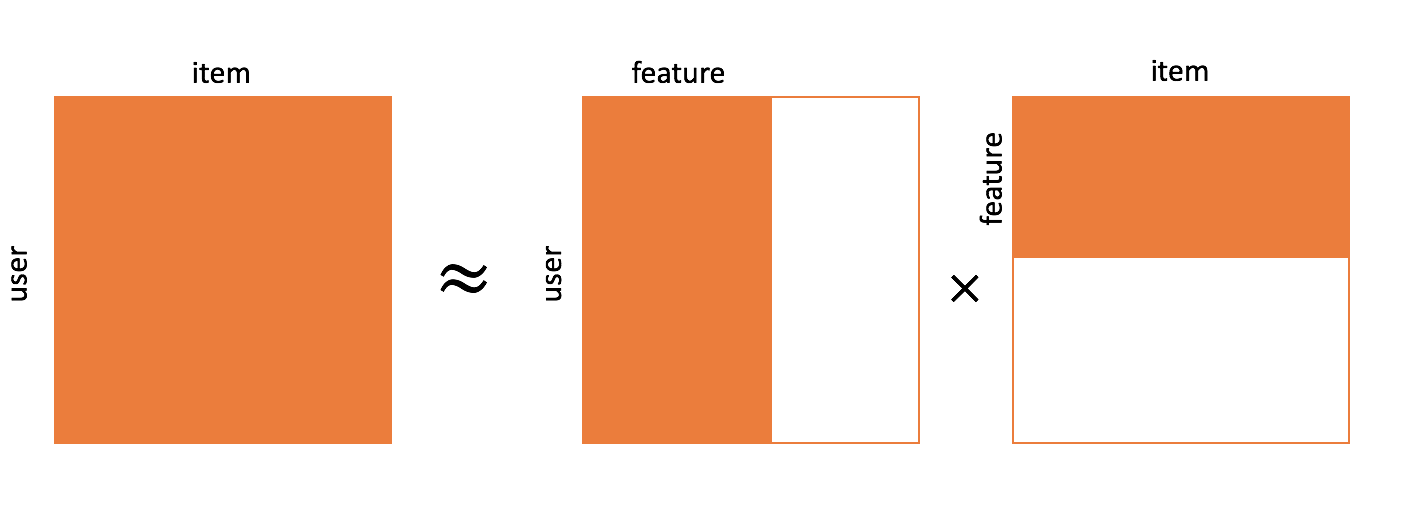

* M is the total number of users
* N is the total number of movies
* K is the total latent features


* R is MxN user-movie rating matrix
* P is MxK user-feature affinity matrix which represents the association between users and features
* Q is NxK item-feature relevance matrix which represents the association between movies and features
* Σ is KxK diagonal feature weight matrix which represents the essential weights of features